# NHANES data exploration

https://www.cdc.gov/nchs/nhanes/about/index.html

In [1]:
import pandas as pd

## Body Measures

In [2]:

url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BMX_L.xpt"
pd.read_sas(url)

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,130378.0,1.0,86.9,NaN,NaN,NaN,NaN,NaN,179.5,NaN,...,42.8,NaN,42.0,NaN,35.7,NaN,98.3,NaN,102.9,NaN
1,130379.0,1.0,101.8,NaN,NaN,NaN,NaN,NaN,174.2,NaN,...,38.5,NaN,38.7,NaN,33.7,NaN,114.7,NaN,112.4,NaN
2,130380.0,1.0,69.4,NaN,NaN,NaN,NaN,NaN,152.9,NaN,...,38.5,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN
3,130381.0,1.0,34.3,NaN,NaN,NaN,NaN,NaN,120.1,NaN,...,NaN,NaN,25.4,NaN,23.4,NaN,70.4,NaN,NaN,NaN
4,130382.0,3.0,13.6,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,142306.0,1.0,25.3,NaN,NaN,NaN,NaN,NaN,128.0,NaN,...,32.0,NaN,25.0,NaN,19.0,NaN,57.7,NaN,NaN,NaN
8856,142307.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,143.8,NaN,...,NaN,1.0,34.0,NaN,35.4,NaN,NaN,1.0,NaN,1.0
8857,142308.0,1.0,79.3,NaN,NaN,NaN,NaN,NaN,173.3,NaN,...,41.8,NaN,40.0,NaN,30.6,NaN,98.4,NaN,97.7,NaN
8858,142309.0,1.0,81.9,NaN,NaN,NaN,NaN,NaN,179.1,NaN,...,44.0,NaN,40.0,NaN,30.8,NaN,96.0,NaN,103.3,NaN


## Files required for calculation of phenotypic age
- publication with formula for phynotypic age: https://pmc.ncbi.nlm.nih.gov/articles/PMC5940111/

In [3]:
# the newest data dont have all required data such as Albuminin, use older data

base_url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/"

name2file = {
    "albumin": "BIOPRO_J.xpt",  # g/L
    "creatinine": "BIOPRO_J.xpt",  # umol/L
    "glucose_serum": "BIOPRO_J.xpt",  # mmol/L
    "c_reactive_protein": "HSCRP_J.xpt",  # mg/L
    "lymphocyte_percent": "CBC_J.xpt",  # %
    "mean_cell_volume": "CBC_J.xpt",  # fL
    "red_cell_distribution_width": "CBC_J.xpt",  # %
    "alkaline_phosphatase": "BIOPRO_J.xpt",  # U/L
    "white_blood_cell_count": "CBC_J.xpt",  # 1000 cells/uL
    "age": "DEMO_J.xpt",  # Years
}

name2entry = {
    "albumin": "LBDSALSI",  # g/L
    "creatinine": "LBDSCRSI",  # umol/L
    "glucose_serum": "LBDSGLSI",  # mmol/L
    "c_reactive_protein": "LBXHSCRP",  # TODO: mg/L -> log(mg/dL)
    "lymphocyte_percent": "LBXLYPCT",  # %
    "mean_cell_volume": "LBXMCVSI",  # fL
    "red_cell_distribution_width": "LBXRDW",  # %
    "alkaline_phosphatase": "LBXSAPSI",  # IU/L == U/L
    "white_blood_cell_count": "LBXWBCSI",  # 1000 cells/uL
    "age": "RIDAGEYR",  # Years
}


url = base_url+name2file["c_reactive_protein"]
pd.read_sas(url)

,SEQN,LBXHSCRP,LBDHRPLC
0,93703.0,NaN,NaN
1,93704.0,0.29,5.397605e-79
2,93705.0,2.72,5.397605e-79
3,93706.0,0.74,5.397605e-79
4,93707.0,0.32,5.397605e-79
...,...,...,...
8361,102952.0,0.45,5.397605e-79
8362,102953.0,1.84,5.397605e-79
8363,102954.0,0.81,5.397605e-79
8364,102955.0,5.11,5.397605e-79


## Read all files, merge and filter for relevant variables

In [4]:
import numpy as np
unique_files = np.unique(list(name2file.values()))
print(unique_files)

['BIOPRO_J.xpt' 'CBC_J.xpt' 'DEMO_J.xpt' 'HSCRP_J.xpt']


In [5]:
df = pd.read_sas(base_url + unique_files[3])  # manually test downloading all files
df

,SEQN,LBXHSCRP,LBDHRPLC
0,93703.0,NaN,NaN
1,93704.0,0.29,5.397605e-79
2,93705.0,2.72,5.397605e-79
3,93706.0,0.74,5.397605e-79
4,93707.0,0.32,5.397605e-79
...,...,...,...
8361,102952.0,0.45,5.397605e-79
8362,102953.0,1.84,5.397605e-79
8363,102954.0,0.81,5.397605e-79
8364,102955.0,5.11,5.397605e-79


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# download all files to data directory
import requests
import os

def download_file(url, filename):
    response = requests.get(url)
    with open(filename, mode="wb") as file:
        file.write(response.content)

data_path = os.path.join("..", "data")
for file in unique_files:
    os.makedirs(data_path, exist_ok=True)
    download_file(base_url+file, os.path.join(data_path, file))

In [8]:
df = pd.read_sas(os.path.join(data_path, unique_files[3]))
counts = df["SEQN"].value_counts()
print(f"counts>1 ={counts[counts > 1]}")
print(f"number of counts>1 is: {len(counts[counts > 1])}")

counts>1 =Series([], Name: count, dtype: int64)
number of counts>1 is: 0


=> all SEQN entries seems to be unique => unique values

In [9]:
# try to merge based on SEQN/patient
raw_dfs = [ pd.read_sas(os.path.join(data_path, file)) for file in unique_files ]
result_df = raw_dfs[0]
for raw_df in raw_dfs[1:]:
    result_df = result_df.merge(raw_df, on="SEQN")

In [10]:
for raw_df in raw_dfs:
    print(type(raw_df))
    print(len(raw_df))
print("===== RESULTING DF =====")
print(type(result_df))
print(len(result_df))

<class 'pandas.core.frame.DataFrame'>
6401
<class 'pandas.core.frame.DataFrame'>
8366
<class 'pandas.core.frame.DataFrame'>
9254
<class 'pandas.core.frame.DataFrame'>
8366
===== RESULTING DF =====
<class 'pandas.core.frame.DataFrame'>
6401


In [11]:
result_df

,SEQN,LBXSATSI,LBDSATLC,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBDSBUSI,...,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,LBXHSCRP,LBDHRPLC
0,93705.0,16.0,5.397605e-79,4.4,44.0,74.0,20.0,31.0,11.0,3.93,...,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82,2.72,5.397605e-79
1,93706.0,10.0,5.397605e-79,4.4,44.0,79.0,14.0,28.0,12.0,4.28,...,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN,0.74,5.397605e-79
2,93707.0,13.0,5.397605e-79,5.2,52.0,238.0,24.0,22.0,17.0,6.07,...,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88,0.32,5.397605e-79
3,93708.0,19.0,5.397605e-79,3.9,39.0,66.0,21.0,27.0,16.0,5.71,...,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63,1.83,5.397605e-79
4,93709.0,15.0,5.397605e-79,3.7,37.0,86.0,17.0,24.0,20.0,7.14,...,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41,6.94,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,102952.0,22.0,5.397605e-79,4.8,48.0,57.0,27.0,27.0,13.0,4.64,...,1.0,16896.276203,18338.711104,2.0,138.0,4.0,4.0,0.95,0.45,5.397605e-79
6397,102953.0,40.0,5.397605e-79,4.0,40.0,115.0,29.0,24.0,17.0,6.07,...,NaN,61630.380013,63661.951573,2.0,137.0,12.0,12.0,NaN,1.84,5.397605e-79
6398,102954.0,6.0,5.397605e-79,3.9,39.0,55.0,15.0,21.0,8.0,2.86,...,NaN,17160.895269,17694.783346,1.0,144.0,10.0,10.0,1.18,0.81,5.397605e-79
6399,102955.0,11.0,5.397605e-79,4.1,41.0,84.0,16.0,23.0,11.0,3.93,...,2.0,14238.445922,14871.839636,1.0,136.0,9.0,9.0,2.24,5.11,5.397605e-79


In [12]:
# filter 
relevant_cols = list(name2entry.values())+["SEQN"]
print(relevant_cols)
print(result_df.columns.to_list())
# result_df = result_df[relevant_cols]
result_df = result_df.filter(items=relevant_cols)

['LBDSALSI', 'LBDSCRSI', 'LBDSGLSI', 'LBXHSCRP', 'LBXLYPCT', 'LBXMCVSI', 'LBXRDW', 'LBXSAPSI', 'LBXWBCSI', 'RIDAGEYR', 'SEQN']
['SEQN', 'LBXSATSI', 'LBDSATLC', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI', 'LBXSASSI', 'LBXSC3SI', 'LBXSBU', 'LBDSBUSI', 'LBXSCLSI', 'LBXSCK', 'LBXSCR', 'LBDSCRSI', 'LBXSGB', 'LBDSGBSI', 'LBXSGL', 'LBDSGLSI', 'LBXSGTSI', 'LBDSGTLC', 'LBXSIR', 'LBDSIRSI', 'LBXSLDSI', 'LBXSOSSI', 'LBXSPH', 'LBDSPHSI', 'LBXSKSI', 'LBXSNASI', 'LBXSTB', 'LBDSTBSI', 'LBDSTBLC', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSTP', 'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXNRBC', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3

In [13]:
result_df

,LBDSALSI,LBDSCRSI,LBDSGLSI,LBXHSCRP,LBXLYPCT,LBXMCVSI,LBXRDW,LBXSAPSI,LBXWBCSI,RIDAGEYR,SEQN
0,44.0,81.33,4.72,2.72,40.0,67.0,15.6,74.0,8.6,66.0,93705.0
1,44.0,71.60,5.22,0.74,24.6,89.7,12.2,79.0,6.1,18.0,93706.0
2,52.0,56.58,6.38,0.32,37.1,83.9,13.6,238.0,11.2,13.0,93707.0
3,39.0,51.27,6.44,1.83,31.3,86.8,13.4,66.0,6.0,66.0,93708.0
4,37.0,116.69,5.33,6.94,25.8,88.8,15.7,86.0,7.2,75.0,93709.0
...,...,...,...,...,...,...,...,...,...,...,...
6396,48.0,61.88,8.33,0.45,34.9,87.7,13.3,57.0,5.1,70.0,102952.0
6397,40.0,81.33,5.61,1.84,28.3,88.8,13.6,115.0,8.3,42.0,102953.0
6398,39.0,61.00,4.88,0.81,43.5,61.9,19.6,55.0,5.1,41.0,102954.0
6399,41.0,75.14,4.66,5.11,33.4,68.4,17.4,84.0,11.4,14.0,102955.0


## analyze for NaNs
- how many rows hold NaNs

In [14]:
rows_isna = result_df.isna().any(axis=1)  # any nan values in a row (column is reduced by axis=1)
rows_isna.value_counts()

False    5877
True      524
Name: count, dtype: int64

In [15]:
result_df = result_df.dropna(axis=0).reset_index(drop=True).copy()  # drop rows containing missing values
result_df

,LBDSALSI,LBDSCRSI,LBDSGLSI,LBXHSCRP,LBXLYPCT,LBXMCVSI,LBXRDW,LBXSAPSI,LBXWBCSI,RIDAGEYR,SEQN
0,44.0,81.33,4.72,2.72,40.0,67.0,15.6,74.0,8.6,66.0,93705.0
1,44.0,71.60,5.22,0.74,24.6,89.7,12.2,79.0,6.1,18.0,93706.0
2,52.0,56.58,6.38,0.32,37.1,83.9,13.6,238.0,11.2,13.0,93707.0
3,39.0,51.27,6.44,1.83,31.3,86.8,13.4,66.0,6.0,66.0,93708.0
4,37.0,116.69,5.33,6.94,25.8,88.8,15.7,86.0,7.2,75.0,93709.0
...,...,...,...,...,...,...,...,...,...,...,...
5872,48.0,61.88,8.33,0.45,34.9,87.7,13.3,57.0,5.1,70.0,102952.0
5873,40.0,81.33,5.61,1.84,28.3,88.8,13.6,115.0,8.3,42.0,102953.0
5874,39.0,61.00,4.88,0.81,43.5,61.9,19.6,55.0,5.1,41.0,102954.0
5875,41.0,75.14,4.66,5.11,33.4,68.4,17.4,84.0,11.4,14.0,102955.0


## Adapt Units where necessary and caluclate phenoage (target variable)
- LBXHSCRP (High-Sensitivity C-Reactive Protein (hs-CRP) (mg/L)) has to be transformed to mg/dL

In [16]:
result_df["LBXHSCRP_mg_dL"] = result_df["LBXHSCRP"]*10

In [17]:
# Variable search: https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx
col2description = {
    "LBDSALSI":         "Albumin, refrigerated serum(g/L)",
    "LBDSCRSI":         "Creatinine, refrigerated serum (umol/L)",
    "LBDSGLSI":         "Glucose, refrigerated serum (mmol/L)",  # mmol/L
    "LBXHSCRP":         "High-Sensitivity C-Reactive Protein (hs-CRP) (mg/L)",  # TODO: mg/L -> log(mg/dL) (for phenoage calculation)
    "LBXLYPCT":         "Lymphocyte percent (%)",  # %
    "LBXMCVSI":         "Mean cell volume (fL)",  # fL
    "LBXRDW":           "Red cell distribution width (%)",  # %
    "LBXSAPSI":         "Alkaline Phosphatase (ALP) (IU/L)",  # IU/L == U/L
    "LBXWBCSI":         "White blood cell count (1000 cells/uL)",  # 1000 cells/uL
    "RIDAGEYR":         "Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.",  # Years
    "LBXHSCRP_mg_dL":   "[self-calculated] High-Sensitivity C-Reactive Protein (hs-CRP) (mg/L)"   # mg/dL
}

In [18]:
def log_robust(x: np.ndarray, epsilon: float=1e-6):
    """
    robust natural logarithm to prevent numerical instability at log(0) which is not defined (negative infinity)
    it replaces values x smaller than epsilon with epsilon. epsilon is a small constant.

    Args:
        x (np.ndarray): values x for which the natural logarithm is calculated
        epsilon (float): small constant

    Returns:
        np.ndarray: natural log of max(x, epsilon)
    """
    return np.log(np.maximum(x, epsilon))


def calculate_phenoage_numpy(
    albumin: np.ndarray,
    creatinine: np.ndarray,
    glucose: np.ndarray,
    c_reactive_protein: np.ndarray,
    lymphocyte_percent: np.ndarray,
    mean_cell_volume: np.ndarray,
    red_cell_distribution_width: np.ndarray,
    alkaline_phosphatase: np.ndarray,
    white_blood_cell_count: np.ndarray,
    age: np.ndarray,
):
    """
    calculation of phenoage using biomarkers, reference: https://www.aging-us.com/article/101414/text with supplementary material
    all biomarkers are provided as arrays. The function returns the phenoage in a resulting array of the same shape as all input arrary.

    Args:
        albumin (np.ndarray): Albumin, refrigerated serum(g/L)
        creatinine (np.ndarray): Creatinine, refrigerated serum (umol/L)
        glucose (np.ndarray): Glucose, refrigerated serum (mmol/L)
        c_reactive_protein (np.ndarray): High-Sensitivity C-Reactive Protein (hs-CRP) (mg/dL)
        lymphocyte_percent (np.ndarray): Lymphocyte percent (%)
        mean_cell_volume (np.ndarray): Mean cell volume (fL)
        red_cell_distribution_width (np.ndarray): Red cell distribution width (%)
        alkaline_phosphatase (np.ndarray): Alkaline Phosphatase (ALP) (IU/L)
        white_blood_cell_count (np.ndarray): White blood cell count (1000 cells/uL)
        age (np.ndarray): Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.

    Returns:
        np.ndarray: calculated array of phenoage
    """
    xb = (
        -19.9067
        - 0.0336 * albumin
        + 0.0095 * creatinine
        + 0.1953 * glucose
        + 0.0954 * log_robust(c_reactive_protein)
        - 0.0120 * lymphocyte_percent
        + 0.0268 * mean_cell_volume
        + 0.3306 * red_cell_distribution_width
        + 0.0019 * alkaline_phosphatase
        + 0.0554 * white_blood_cell_count
        + 0.0804 * age
    )

    mortality_score = 1 - np.exp(-np.exp(xb) * ((np.exp(120 * 0.0076927) - 1) / 0.0076927))
    phenoage = 141.50225 + np.log(-0.00553 * np.log(1 - mortality_score)) / 0.090165

    return phenoage

In [19]:
result_df.loc[:, ["phenoage"]] = calculate_phenoage_numpy(
    albumin=result_df["LBDSALSI"].to_numpy(),
    creatinine=result_df["LBDSCRSI"].to_numpy(),
    glucose=result_df["LBDSGLSI"].to_numpy(),
    c_reactive_protein=result_df["LBXHSCRP_mg_dL"].to_numpy(),
    lymphocyte_percent=result_df["LBXLYPCT"].to_numpy(),
    mean_cell_volume=result_df["LBXMCVSI"].to_numpy(),
    red_cell_distribution_width=result_df["LBXRDW"].to_numpy(),
    alkaline_phosphatase=result_df["LBXSAPSI"].to_numpy(),
    white_blood_cell_count=result_df["LBXWBCSI"].to_numpy(),
    age=result_df["RIDAGEYR"].to_numpy(),
)
result_df

/tmp/ipykernel_14809/4241116239.py:62: RuntimeWarning: divide by zero encountered in log
  phenoage = 141.50225 + np.log(-0.00553 * np.log(1 - mortality_score)) / 0.090165


,LBDSALSI,LBDSCRSI,LBDSGLSI,LBXHSCRP,LBXLYPCT,LBXMCVSI,LBXRDW,LBXSAPSI,LBXWBCSI,RIDAGEYR,SEQN,LBXHSCRP_mg_dL,phenoage
0,44.0,81.33,4.72,2.72,40.0,67.0,15.6,74.0,8.6,66.0,93705.0,27.2,65.060415
1,44.0,71.60,5.22,0.74,24.6,89.7,12.2,79.0,6.1,18.0,93706.0,7.4,15.838980
2,52.0,56.58,6.38,0.32,37.1,83.9,13.6,238.0,11.2,13.0,93707.0,3.2,16.672135
3,39.0,51.27,6.44,1.83,31.3,86.8,13.4,66.0,6.0,66.0,93708.0,18.3,64.273164
4,37.0,116.69,5.33,6.94,25.8,88.8,15.7,86.0,7.2,75.0,93709.0,69.4,89.861073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,48.0,61.88,8.33,0.45,34.9,87.7,13.3,57.0,5.1,70.0,102952.0,4.5,66.892613
5873,40.0,81.33,5.61,1.84,28.3,88.8,13.6,115.0,8.3,42.0,102953.0,18.4,48.047698
5874,39.0,61.00,4.88,0.81,43.5,61.9,19.6,55.0,5.1,41.0,102954.0,8.1,51.687931
5875,41.0,75.14,4.66,5.11,33.4,68.4,17.4,84.0,11.4,14.0,102955.0,51.1,29.520607


In [20]:
result_df.describe()

/home/conrad/.local/share/virtualenvs/phenoage-regression-SQm2vM_8/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,LBDSALSI,LBDSCRSI,LBDSGLSI,LBXHSCRP,LBXLYPCT,LBXMCVSI,LBXRDW,LBXSAPSI,LBXWBCSI,RIDAGEYR,SEQN,LBXHSCRP_mg_dL,phenoage
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000
mean,40.793772,77.369445,5.594819,3.865072,31.779769,87.890965,13.841756,90.614940,7.323481,45.454994,98281.915944,38.650723,inf
std,3.444396,39.539800,1.908555,7.833199,8.987351,6.242996,1.314839,52.462959,5.649520,20.997955,2683.789024,78.331989,NaN
min,21.000000,22.100000,2.610000,0.110000,5.000000,35.400000,11.300000,16.000000,1.900000,12.000000,93705.000000,1.100000,2.262867
25%,39.000000,60.110000,4.770000,0.750000,25.600000,84.800000,13.000000,64.000000,5.700000,26.000000,95964.000000,7.500000,28.449714
50%,41.000000,72.490000,5.110000,1.700000,31.400000,88.400000,13.500000,79.000000,7.000000,46.000000,98260.000000,17.000000,49.684918
75%,43.000000,86.630000,5.610000,4.160000,37.400000,91.700000,14.200000,98.000000,8.400000,63.000000,100592.000000,41.600000,67.489142
max,54.000000,1126.220000,34.750000,182.820000,89.700000,114.600000,29.200000,638.000000,400.000000,80.000000,102956.000000,1828.200000,inf


In [21]:
# dependent on using the non robust log, there appear some infinite values
result_df["phenoage"].value_counts(dropna=False)

phenoage
inf          20
69.448387     1
20.053763     1
12.264675     1
20.711163     1
             ..
44.254210     1
20.686723     1
19.050230     1
20.728460     1
44.745727     1
Name: count, Length: 5858, dtype: int64

In [22]:
# as only 20 values reach infinite just drop these data
result_df.replace([np.inf, -np.inf], np.nan, inplace=True)
result_df = result_df.dropna(axis=0)
len(result_df)

5857

## Data Exploration - plotting age with phenoage to check validity

Text(0, 0.5, 'phenoage')

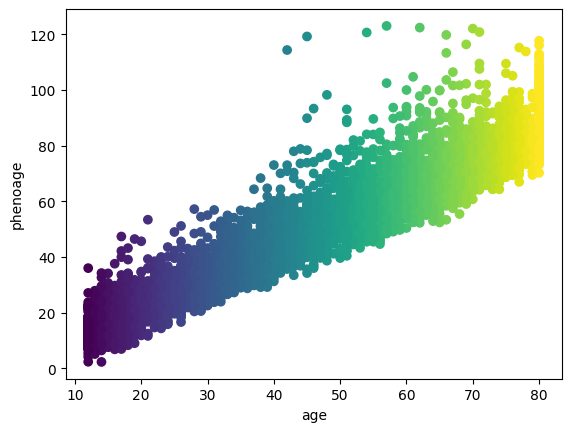

In [23]:
import matplotlib.pyplot as plt
plt.scatter(result_df["RIDAGEYR"], result_df["phenoage"], c=result_df["RIDAGEYR"])
plt.xlabel("age")
plt.ylabel("phenoage")

## Select Features for the model (other data)

In [24]:
feature2description = {
    "RIDAGEYR": "Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.",
    "RIAGENDR": "Gender of the participant.",
    "BMXHT": "Standing Height (cm)",
    "BMXWAIST": "Waist Circumference (cm)",
    "BMXWT": "Weight (kg)",
    "PAD680": "(Minutes) The following question is about sitting at school, at home, getting to and from places, or with friends including time spent sitting at a desk, traveling in a car or bus, reading, playing cards, watching television, or using a computer. Do not include time spent sleeping. How much time {do you/does SP} usually spend sitting on a typical day?",
    "SMQ020": "These next questions are about cigarette smoking and other tobacco use. {Have you/Has SP} smoked at least 100 cigarettes in {your/his/her} entire life?",
    "ALQ121": "ALQ121 - Past 12 mo how often have alcohol drink",
    "SLD012": "Number of hours usually sleep on weekdays or workdays.",
    "SLD013": "Number of hours usually sleep on weekends or non-workdays.",
}
feature2file = {
    "RIDAGEYR": "DEMO_J.xpt",
    "RIAGENDR": "DEMO_J.xpt",
    "BMXHT": "BMX_J.xpt",
    "BMXWAIST": "BMX_J.xpt",
    "BMXWT": "BMX_J.xpt",
    "PAD680": "PAQ_J.xpt",
    "SMQ020": "SMQ_J.xpt",
    "ALQ121": "ALQ_J.xpt",
    "SLD012": "SLQ_J.xpt",
    "SLD013": "SLQ_J.xpt",
}

In [25]:
# get all file names
unique_files_features = np.unique(list(feature2file.values()))
unique_files_features

array(['ALQ_J.xpt', 'BMX_J.xpt', 'DEMO_J.xpt', 'PAQ_J.xpt', 'SLQ_J.xpt',
       'SMQ_J.xpt'], dtype='<U10')

In [26]:
data_path = os.path.join("..", "data")
for file in unique_files_features:
    os.makedirs(data_path, exist_ok=True)
    download_file(base_url+file, os.path.join(data_path, file))

In [27]:
# try to merge based on SEQN/patient
raw_dfs = [ pd.read_sas(os.path.join(data_path, file), format="xport", encoding="utf-8") for file in unique_files_features ]
feature_df = raw_dfs[0]
for raw_df in raw_dfs[1:]:
    feature_df = feature_df.merge(raw_df, on="SEQN")
feature_df = feature_df.filter(items=list(feature2file.keys())+["SEQN"])

In [28]:
feature_df.describe()

,RIDAGEYR,RIAGENDR,BMXHT,BMXWAIST,BMXWT,PAD680,SMQ020,ALQ121,SLD012,SLD013,SEQN
count,5533.000000,5533.000000,5444.000000,5184.000000,5444.000000,5.523000e+03,5533.000000,4.545000e+03,5489.000000,5482.000000,5533.000000
mean,49.816555,1.517079,166.362344,100.163387,82.468993,3.874525e+02,1.596602,4.984378e+00,7.621242,8.299617,98275.674679
std,18.649364,0.499753,10.066868,17.223553,22.980417,7.603616e+02,0.490624,4.320915e+00,1.677869,1.765133,2685.591411
min,18.000000,1.000000,138.300000,56.400000,32.600000,5.397605e-79,1.000000,5.397605e-79,2.000000,2.000000,93705.000000
25%,33.000000,1.000000,158.900000,87.900000,66.500000,1.800000e+02,1.000000,1.000000e+00,6.500000,7.000000,95945.000000
50%,51.000000,2.000000,165.900000,98.900000,78.900000,3.000000e+02,2.000000,5.000000e+00,7.500000,8.000000,98257.000000
75%,65.000000,2.000000,173.600000,110.700000,94.500000,4.800000e+02,2.000000,8.000000e+00,8.500000,9.000000,100590.000000
max,80.000000,2.000000,197.700000,169.500000,242.600000,9.999000e+03,2.000000,9.900000e+01,14.000000,14.000000,102956.000000


# merge phenoage and feature_df

In [29]:
data_df = feature_df.merge(result_df[["SEQN", "phenoage"]], on="SEQN")
data_df

,RIDAGEYR,RIAGENDR,BMXHT,BMXWAIST,BMXWT,PAD680,SMQ020,ALQ121,SLD012,SLD013,SEQN,phenoage
0,66.0,2.0,158.3,101.8,79.5,300.0,1.0,7.000000e+00,8.0,8.0,93705.0,65.060415
1,18.0,1.0,175.7,79.3,66.3,240.0,2.0,NaN,10.5,11.5,93706.0,15.838980
2,66.0,2.0,150.2,88.2,53.5,120.0,2.0,NaN,8.0,8.0,93708.0,64.273164
3,75.0,2.0,151.1,113.0,88.8,600.0,1.0,NaN,7.0,6.5,93709.0,89.861073
4,56.0,1.0,170.6,86.6,62.1,420.0,2.0,5.000000e+00,7.0,9.0,93711.0,57.153173
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,33.0,1.0,180.1,85.5,76.9,60.0,1.0,NaN,6.5,6.5,102949.0,38.614643
5106,70.0,2.0,156.5,82.2,49.0,120.0,2.0,5.397605e-79,8.5,8.5,102952.0,66.892613
5107,42.0,1.0,164.9,114.8,97.4,360.0,1.0,6.000000e+00,6.0,5.0,102953.0,48.047698
5108,41.0,2.0,162.6,86.4,69.1,600.0,2.0,NaN,8.0,7.0,102954.0,51.687931


In [30]:
print(data_df.isna().sum())

RIDAGEYR      0
RIAGENDR      0
BMXHT        75
BMXWAIST    267
BMXWT        74
PAD680       10
SMQ020        0
ALQ121      848
SLD012       36
SLD013       43
SEQN          0
phenoage      0
dtype: int64


In [31]:
data_df["ALQ121"].value_counts(dropna=False)  # stange value: 5.397605e-79: seems to be the zero (0) code

ALQ121
5.397605e-79    982
NaN             848
6.000000e+00    571
1.000000e+01    491
9.000000e+00    450
7.000000e+00    333
5.000000e+00    313
4.000000e+00    309
8.000000e+00    279
3.000000e+00    252
2.000000e+00    146
1.000000e+00    134
9.900000e+01      1
7.700000e+01      1
Name: count, dtype: int64

In [32]:
data_df = data_df.dropna(axis=0).reset_index().copy()
len(data_df)

4065

# feature engineering
| Feature   | Description |Feature Engineering | Link |
| --------- | --------- | --------- | --------- |
|RIDAGEYR	| years | no | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_DEMO.htm#RIDAGEYR |
|RIAGENDR	| gender: male female | categorical one-hot | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_DEMO.htm#RIAGENDR |
|BMXHT	    | body height | no | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_BMX.htm#BMXHT |
|BMXWAIST	| waist | no | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_BMX.htm#BMXWAIST |
|BMXWT      | weight (kg) | no | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_BMX.htm#BMXWT |
|PAD680	    | Minutes sedentary activity | only use valid range of 0 to 1320 | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_PAQ.htm#PAD680 |
|SMQ020	    | Categorical: Smoked at least 100 cigarates in life (yes/no/refused/dont_know) | categorical one-hot | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_SMQ.htm#SMQ020 |
|ALQ121	    | Categorical: How often consumed alcohol during past 12 month? | transform to continuous variable | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_ALQ.htm#ALQ121 |
|SLD012	    | Sleep hours - weekdays or workdays | no | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_SLQ.htm#SLD012 |
|SLD013	    | Sleep hours - weekends | no | https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/P_SLQ.htm#SLD013 |

In [33]:
data_df["ALQ121"].value_counts()
# data_df["ALQ121"].astype(np.int32).value_counts()
# data_df["ALQ121"].astype(np.int32).replace({0: -1}).value_counts()

ALQ121
5.397605e-79    920
6.000000e+00    553
1.000000e+01    470
9.000000e+00    429
7.000000e+00    321
5.000000e+00    303
4.000000e+00    295
8.000000e+00    265
3.000000e+00    239
2.000000e+00    142
1.000000e+00    127
7.700000e+01      1
Name: count, dtype: int64

In [34]:
def prepare_raw_features(df: pd.DataFrame):
    """
    prepare a dataframe with the defined features
    # one-hot categorical features will be transformed to strings for the scikit-learn.DictVectorizer

    Args:
        df (pd.DataFrame): dataframe with the raw features from NHANES data
    """
    df = df.copy()

    # ===== categorical =====
    categorical_one_hot = ["RIAGENDR", "SMQ020"]

    df["RIAGENDR"] = df["RIAGENDR"].astype(np.int32)
    df["RIAGENDR"] = df["RIAGENDR"].replace({1: "male", 2: "female"})

    df["SMQ020"] = df["SMQ020"].astype(np.int32)
    df["SMQ020"] = df["SMQ020"].map(lambda x: {1: "yes", 2: "no"}.get(x, np.nan))  # unknown values become NaN

    df[categorical_one_hot] = df[categorical_one_hot].astype(str)

    # ===== continuous =====

    # Minutes sedentary activity | only use valid range of 0 to 1320
    df = df[(df.PAD680 >= 0) & (df.PAD680 <= 1320)]

    # frequency of alcohol consumption during last 12 months: transform categorical to continuous variable 
    df["ALQ121"] = df["ALQ121"].astype(np.int32)
    
    alcohol_consumption_categorical_to_continuous = {
        0: 0.,
        1: 365.,  # every day
        2: 52.*5,  # almost every day: assume 5 days a week
        3: 52.*3.5,  # 3-4 times a week (52 weeks)
        4: 52.*2,  # 2 times a week
        5: 52.*1,  # once a week
        6: 12.*2.5,  # 2-3 times a month
        7: 12.*1,  # once a month
        8: 9.,  # 9 times a year
        9: 4.5,
        10: 1.5,
        77: np.nan,  # refused
        99: np.nan,  # missing
    }
    df = df[((df["ALQ121"] >= 0) & (df["ALQ121"] <= 10)) | (df["ALQ121"] == 77) | (df["ALQ121"] == 99)]
    df["ALQ121"] = df["ALQ121"].replace(alcohol_consumption_categorical_to_continuous)

    df["PAD680"] = df["PAD680"].astype(np.int32)

    df = df.dropna(axis=0).reset_index()
    return df

raw_feature_df = prepare_raw_features(data_df)

# prepare_raw_features(data_df)["ALQ121"].value_counts()
# prepare_raw_features(data_df)["RIAGENDR"].value_counts()
# prepare_raw_features(data_df)["SMQ020"].value_counts()
prepare_raw_features(data_df).describe(include="all", percentiles=[])

,level_0,index,RIDAGEYR,RIAGENDR,BMXHT,BMXWAIST,BMXWT,PAD680,SMQ020,ALQ121,SLD012,SLD013,SEQN,phenoage
count,4045.000000,4045.000000,4045.000000,4045,4045.000000,4045.000000,4045.000000,4045.000000,4045,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2059,NaN,NaN,NaN,NaN,2237,NaN,NaN,NaN,NaN,NaN
mean,2032.401731,2556.894190,49.729790,NaN,167.193276,100.860865,83.555031,334.544129,NaN,49.024969,7.555253,8.264277,98265.633622,53.543415
std,1173.854620,1482.487241,18.136514,NaN,9.852389,17.262613,22.434627,199.560287,NaN,85.051566,1.620635,1.739636,2696.715152,20.778496
min,0.000000,0.000000,18.000000,NaN,141.400000,62.300000,38.200000,0.000000,NaN,0.000000,2.000000,2.000000,93705.000000,8.261523
50%,2031.000000,2563.000000,51.000000,NaN,166.800000,99.600000,79.900000,300.000000,NaN,9.000000,7.500000,8.000000,98244.000000,54.215728
max,4064.000000,5109.000000,80.000000,NaN,195.800000,169.500000,191.400000,1320.000000,NaN,365.000000,14.000000,14.000000,102956.000000,123.023181


### Experimenting with One-Hot-Encoder, Scaler and ColumnTransformer

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# onehot = OneHotEncoder(sparse_output=False)
onehot = OneHotEncoder(drop="if_binary", sparse_output=False)  # binary categories are represented by one column instead of two
raw_feature_df[["RIAGENDR", "SMQ020"]]
onehot.fit(raw_feature_df[["RIAGENDR", "SMQ020"]])
onehot.categories_
# X_cat = onehot.transform(raw_feature_df[["RIAGENDR", "SMQ020"]])
# print(X_cat)

[array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object)]

In [36]:
scaler = StandardScaler()
raw_feature_continuous_df = raw_feature_df[[
    "RIDAGEYR",
    "BMXHT",
    "BMXWAIST",
    "BMXWT",
    "PAD680",
    "ALQ121",
    "SLD012",
    "SLD013",
    ]]
scaler.fit(raw_feature_continuous_df)
scaler.transform(raw_feature_continuous_df)
scaler.get_feature_names_out()

array(['RIDAGEYR', 'BMXHT', 'BMXWAIST', 'BMXWT', 'PAD680', 'ALQ121',
       'SLD012', 'SLD013'], dtype=object)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

def get_feature_transformer(df_features: pd.DataFrame):
    categorical_cols = ["RIAGENDR", "SMQ020"]
    continuous_cols = [
        "RIDAGEYR",
        "BMXHT",
        "BMXWAIST",
        "BMXWT",
        "PAD680",
        "ALQ121",
        "SLD012",
        "SLD013",
    ]

    ct = ColumnTransformer(transformers=[
        ("categorical", OneHotEncoder(drop="if_binary"), categorical_cols),
        ("continuous", StandardScaler(), continuous_cols),
    ])
    ct.fit(df_features)
    return ct

feature_transformer = get_feature_transformer(raw_feature_df)

In [38]:
preprocessed_features_arr = feature_transformer.transform(raw_feature_df)
feature_transformer.get_feature_names_out()

array(['categorical__RIAGENDR_male', 'categorical__SMQ020_yes',
       'continuous__RIDAGEYR', 'continuous__BMXHT',
       'continuous__BMXWAIST', 'continuous__BMXWT', 'continuous__PAD680',
       'continuous__ALQ121', 'continuous__SLD012', 'continuous__SLD013'],
      dtype=object)

In [39]:
def get_target_transformer(df: pd.DataFrame):
    scaler = StandardScaler()
    scaler.fit(df[["phenoage"]])
    return scaler

target_transformer = get_target_transformer(raw_feature_df)
target_transformer.get_feature_names_out()
preprocessed_target_arr = target_transformer.transform(raw_feature_df[["phenoage"]]).ravel()
target_transformer.inverse_transform(preprocessed_target_arr.reshape((-1, 1))).min()

np.float64(8.261522935361398)

In [40]:
print(preprocessed_target_arr.shape)


(4045,)


# Test Model Training with all data

In [41]:
# preprocessed_features_arr
# preprocessed_target_arr

In [42]:
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_absolute_error

model = LinearSVR(C=0.1)
# model = SVR(kernel="rbf", C=100)
# model = SVR(kernel="poly", C=100, degree=3)
model.fit(preprocessed_features_arr, preprocessed_target_arr)
predicted_target_arr = model.predict(preprocessed_features_arr)


In [43]:
error = mean_absolute_error(target_transformer.inverse_transform(preprocessed_target_arr.reshape((-1,1))), target_transformer.inverse_transform(predicted_target_arr.reshape((-1,1))))
error

4.8988651489014385

(array([[118.,  28.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [115., 299., 148.,  16.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  6.,  66., 218., 285.,  63.,   1.,   0.,   0.,   0.,   0.],
        [  0.,   3.,  24., 119., 264., 218.,  27.,   0.,   0.,   0.],
        [  0.,   0.,   2.,  18.,  62., 220., 378., 115.,   2.,   0.],
        [  0.,   0.,   0.,   3.,   9.,  46., 147., 290., 147.,  19.],
        [  0.,   0.,   0.,   0.,   2.,   9.,  17.,  64., 171., 133.],
        [  0.,   0.,   0.,   0.,   2.,   3.,   7.,  18.,  37.,  77.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   4.,  10.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   3.,   4.]]),
 array([  8.26152294,  19.73768878,  31.21385462,  42.69002047,
         54.16618631,  65.64235216,  77.118518  ,  88.59468385,
        100.07084969, 111.54701553, 123.02318138]),
 array([14.40252068, 21.83640458, 29.27028847, 36.70417237, 44.13805627,
        51.57194017, 59.00582406, 66.43970796

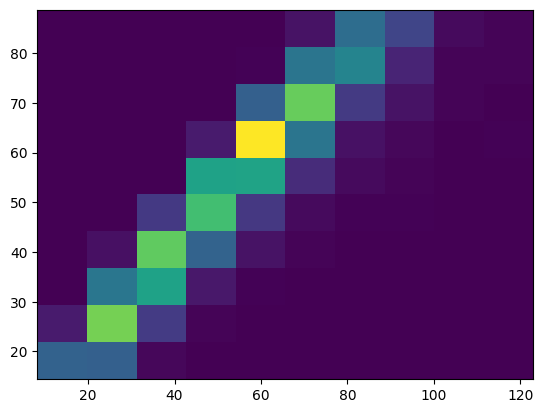

In [44]:
plt.hist2d(target_transformer.inverse_transform(preprocessed_target_arr.reshape((-1,1))).ravel(), target_transformer.inverse_transform(predicted_target_arr.reshape((-1,1))).ravel())

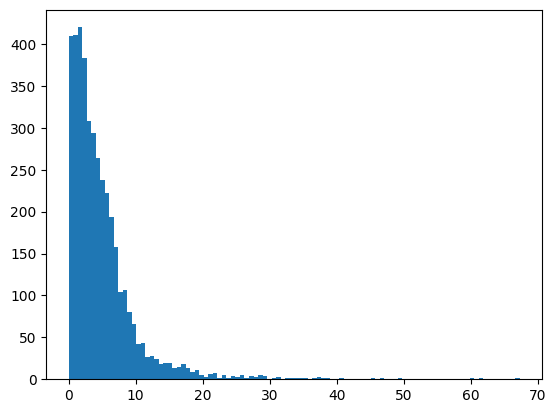

In [45]:
abs_errors = np.abs(target_transformer.inverse_transform(preprocessed_target_arr.reshape((-1,1))) - target_transformer.inverse_transform(predicted_target_arr.reshape((-1,1))))
plt.hist(abs_errors, bins=100)
plt.show()